In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, GRU, Dense, SimpleRNN, Conv1D, MaxPooling1D, Flatten, Bidirectional, Dropout
from keras.optimizers import Adam



In [3]:
# Load the datasets
gold_price_data = pd.read_csv('dataset/ADANIENT.NS.csv')

# Display the first few rows of each dataset to understand their structure
print("Gold Price Data:")
print(gold_price_data.head())

# Preprocessing
gold_price_data.isna().sum().sum()
gold_price_data.dropna(inplace=True)

gold_price_data['Date'] = pd.to_datetime(gold_price_data['Date'])
gold_price_data.set_index('Date', inplace=True)
gold_price_data = gold_price_data.sort_index()

# Use only the 'Close' price for prediction
data = gold_price_data['Close'].values
data = data.reshape(-1, 1)

Gold Price Data:
         Date      Open      High       Low     Close  Adj Close     Volume
0  2002-07-01  1.364148  1.401700  1.334259  1.362615  -0.010452  1080397.0
1  2002-07-02  1.386372  1.390971  1.356484  1.373344  -0.010535  1016147.0
2  2002-07-03  1.371811  1.387139  1.364914  1.373344  -0.010535   980394.0
3  2002-07-04  1.379475  1.401700  1.379475  1.381008  -0.010593   972747.0
4  2002-07-05  1.388672  1.388672  1.372578  1.377942  -0.010570   974496.0


In [4]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [5]:
def create_dataset(data, window_size=1):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        a = data[i:(i + window_size), 0]
        X.append(a)
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)
window_size = 60  # You can adjust this window size
X_train, y_train = create_dataset(train_data, window_size)
X_test, y_test = create_dataset(test_data, window_size)

# Reshape input to be [samples, time steps, features] for LSTM/RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [6]:
# Bidirectional LSTM model
model_bi_lstm = Sequential()
model_bi_lstm.add(Bidirectional(LSTM(units=100, return_sequences=True, input_shape=(window_size, 1))))
model_bi_lstm.add(Dropout(0.2))
model_bi_lstm.add(Bidirectional(LSTM(units=100, return_sequences=False)))
model_bi_lstm.add(Dropout(0.2))
model_bi_lstm.add(Dense(units=50))
model_bi_lstm.add(Dense(units=1))
model_bi_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model_bi_lstm.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
134/134 [==============================] - 21s 105ms/step - loss: 4.2667e-05
Epoch 2/50
134/134 [==============================] - 13s 101ms/step - loss: 3.3124e-06
Epoch 3/50
134/134 [==============================] - 14s 105ms/step - loss: 2.6038e-06
Epoch 4/50
134/134 [==============================] - 13s 100ms/step - loss: 1.8799e-06
Epoch 5/50
134/134 [==============================] - 13s 94ms/step - loss: 1.9841e-06
Epoch 6/50
134/134 [==============================] - 13s 94ms/step - loss: 1.6578e-06
Epoch 7/50
134/134 [==============================] - 12s 91ms/step - loss: 1.9842e-06
Epoch 8/50
134/134 [==============================] - 13s 94ms/step - loss: 1.7501e-06
Epoch 9/50
134/134 [==============================] - 12s 92ms/step - loss: 1.6827e-06
Epoch 10/50
134/134 [==============================] - 13s 93ms/step - loss: 1.9481e-06
Epoch 11/50
134/134 [==============================] - 12s 92ms/step - loss: 2.1573e-06
Epoch 12/50
134/134 [================

In [7]:
# GRU model
model_gru = Sequential()
model_gru.add(GRU(units=100, return_sequences=True, input_shape=(window_size, 1)))
model_gru.add(Dropout(0.2))
model_gru.add(GRU(units=100, return_sequences=False))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(units=50))
model_gru.add(Dense(units=1))
model_gru.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model_gru.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
 61/134 [============>.................] - ETA: 12s - loss: 1.0394e-04

KeyboardInterrupt: 

In [ ]:
# RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(units=50, return_sequences=True, input_shape=(window_size, 1)))
model_rnn.add(SimpleRNN(units=50, return_sequences=False))
model_rnn.add(Dense(units=25))
model_rnn.add(Dense(units=1))
model_rnn.compile(optimizer='adam', loss='mean_squared_error')
model_rnn.fit(X_train, y_train, batch_size=1, epochs=1)

4279/4279 [==============================] - 35s 8ms/step - loss: 2.3128e-05


In [ ]:
# CNN model
model_cnn = Sequential()
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(window_size, 1)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(units=50))
model_cnn.add(Dense(units=1))
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
model_cnn.fit(X_train, y_train, batch_size=1, epochs=1)

4279/4279 [==============================] - 5s 1ms/step - loss: 8.8547e-06


In [ ]:
# LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(window_size, 1)))
model_lstm.add(LSTM(units=50, return_sequences=False))
model_lstm.add(Dense(units=25))
model_lstm.add(Dense(units=1))
model_lstm.compile(optimizer='adam', loss='mean_squared_error')
model_lstm.fit(X_train, y_train, batch_size=1, epochs=1)

4279/4279 [==============================] - 54s 12ms/step - loss: 7.6154e-06


In [8]:
# Function to predict and inverse transform the data
def predict_and_inverse_transform(model, X, y):
    predictions = model.predict(X)
    predictions = scaler.inverse_transform(predictions)
    y = scaler.inverse_transform([y])
    return predictions, y

In [9]:
# Predict using Bidirectional LSTM
predictions_bi_lstm, y_test_bi_lstm = predict_and_inverse_transform(model_bi_lstm, X_test, y_test)

# Predict using RNN
predictions_rnn, y_test_rnn = predict_and_inverse_transform(model_rnn, X_test, y_test)

# Predict using CNN
predictions_cnn, y_test_cnn = predict_and_inverse_transform(model_cnn, X_test, y_test)

# Predict using LSTM
predictions_lstm, y_test_lstm = predict_and_inverse_transform(model_lstm, X_test, y_test)

# Predict using GRU
predictions_gru, y_test_gru = predict_and_inverse_transform(model_gru, X_test, y_test)

33/33 [==============================] - 2s 25ms/step


NameError: name 'model_rnn' is not defined

In [11]:
# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_bi_lstm = mean_absolute_error(y_test_bi_lstm[0], predictions_bi_lstm)
mse_bi_lstm = mean_squared_error(y_test_bi_lstm[0], predictions_bi_lstm)

In [10]:
# Calculate MAE and MSE
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_bi_lstm = mean_absolute_error(y_test_bi_lstm[0], predictions_bi_lstm)
mse_bi_lstm = mean_squared_error(y_test_bi_lstm[0], predictions_bi_lstm)

mae_rnn = mean_absolute_error(y_test_rnn[0], predictions_rnn)
mse_rnn = mean_squared_error(y_test_rnn[0], predictions_rnn)

mae_cnn = mean_absolute_error(y_test_cnn[0], predictions_cnn)
mse_cnn = mean_squared_error(y_test_cnn[0], predictions_cnn)

mae_lstm = mean_absolute_error(y_test_lstm[0], predictions_lstm)
mse_lstm = mean_squared_error(y_test_lstm[0], predictions_lstm)

mae_gru = mean_absolute_error(y_test_gru[0], predictions_gru)
mse_gru = mean_squared_error(y_test_gru[0], predictions_gru)

NameError: name 'y_test_rnn' is not defined

In [ ]:
# Print MAE and MSE
print(f'Bidirectional LSTM - MAE: {mae_bi_lstm}, MSE: {mse_bi_lstm}')
print(f'RNN - MAE: {mae_rnn}, MSE: {mse_rnn}')
print(f'CNN - MAE: {mae_cnn}, MSE: {mse_cnn}')
print(f'LSTM - MAE: {mae_lstm}, MSE: {mse_lstm}')
print(f'GRU - MAE: {mae_gru}, MSE: {mse_gru}')

Bidirectional LSTM - MAE: 52.54086150589081, MSE: 8795.767966775671
RNN - MAE: 239.12792721533918, MSE: 111865.86740618024
CNN - MAE: 288.2368675859766, MSE: 151870.36816872776
LSTM - MAE: 291.18416689789063, MSE: 122348.2389987514
GRU - MAE: 65.22013920286298, MSE: 13351.224100488571


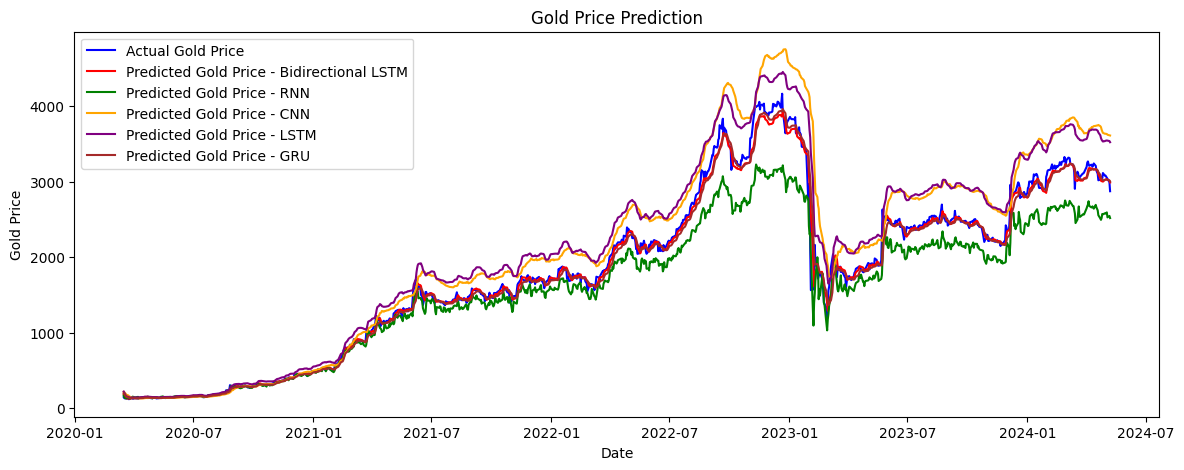

In [ ]:
# Plot predictions
plt.figure(figsize=(14, 5))
plt.plot(gold_price_data.index[train_size+window_size+1:], y_test_bi_lstm[0], color='blue', label='Actual Gold Price')
plt.plot(gold_price_data.index[train_size+window_size+1:], predictions_bi_lstm, color='red', label='Predicted Gold Price - Bidirectional LSTM')
plt.plot(gold_price_data.index[train_size+window_size+1:], predictions_rnn, color='green', label='Predicted Gold Price - RNN')
plt.plot(gold_price_data.index[train_size+window_size+1:], predictions_cnn, color='orange', label='Predicted Gold Price - CNN')
plt.plot(gold_price_data.index[train_size+window_size+1:], predictions_lstm, color='purple', label='Predicted Gold Price - LSTM')
plt.plot(gold_price_data.index[train_size+window_size+1:], predictions_gru, color='brown', label='Predicted Gold Price - GRU')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.title('Gold Price Prediction')
plt.legend()
plt.show()